## <font color=Green> Q2

In [210]:
import pandas as pd
import numpy as np
import re

from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import shap
import phik

# update jupyter kernel automatically
%load_ext autoreload
%autoreload 2

# show all columns/rows
pd.options.display.max_rows = None
pd.options.display.max_columns = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
# load in data
df_survey = pd.read_excel("../data/mock survey data 3.xlsx", "data")
df_survey.head()

,case,year,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,Land_Terminal,First Visit To Singapore,Length of Stay,Travel Type,Gender,Marital Status,Occupation,Occupation.1,Other Designation,Designation (free text),shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any,totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,c4a_1,MainHotel,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others
0,1.0,2018,1,India,Delhi,Leisure,Holiday/ Rest & Relax,660.046512,2.0,NaN,NaN,Yes,6,Packaged,Male,Married,"Executive (sales, administration)",NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,75.0,880.68,234.79,29.35,0.0,0.0,0.0,234.38,101.70,1480.90,1,15.0,0,1,0,0,0,0,0,0,0,0
1,2.0,2018,1,India,Delhi,Leisure,Visiting friends/ relatives (who are not inter...,433.217949,2.0,NaN,NaN,No,50,Non-packaged,Female,Single,Student,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,18.31,14.09,0.0,0.0,0.0,40.00,26.70,99.10,0,NaN,1,0,0,0,0,0,0,0,0,0
2,3.0,2018,1,United Arab Emirates,Dubai,Leisure,General business purpose,335.125000,2.0,NaN,NaN,No,6,Business (Non-packaged),Male,Single,"Manager (CEO, company director, senior manager)",InfoComm Technology,Manager/ Assistant Manager,NaN,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,0.00,969.22,242.30,0.0,0.0,0.0,0.00,4074.75,5286.27,0,NaN,1,0,0,0,0,0,0,0,0,0
3,4.0,2018,1,India,Others,Leisure,Holiday/ Rest & Relax,490.977273,2.0,NaN,NaN,No,7,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",NaN,NaN,NaN,75.0,0.0,37.5,50.0,50.0,37.5,0.0,0.0,0.0,250.0,0.00,125.78,125.78,0.0,0.0,0.0,146.24,276.70,674.50,0,NaN,0,1,1,0,0,0,0,0,0,0
4,5.0,2018,1,Canada,Toronto,Business + Accompanying Pax,Visiting an international student (relative or...,379.800000,2.0,NaN,NaN,Yes,2,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",NaN,NaN,NaN,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1101.81,734.54,275.45,0.0,0.0,0.0,0.00,2070.75,4182.55,1,30.0,1,0,0,0,0,0,0,0,0,0


In [158]:
df_survey["Purpose of Visit"].value_counts()

Purpose of Visit
Leisure                          17717
Business + Accompanying Pax       4147
Healthcare + Accompanying Pax      515
Others/Refused                     356
Education + Accompanying Pax       239
Name: count, dtype: int64

In [159]:
df_survey["Main Purpose of Visit"].value_counts()

Main Purpose of Visit
Holiday/ Rest & Relax                                           8323
Sightseeing/ Attractions                                        3932
Visiting friends/ relatives (who are not international          2927
General business purpose                                        2847
To experience different cultures                                 573
Using Singapore as a hub to go to other destinations: Stop       498
To visit the integrated resorts(e.g. Marina Bay Sands,           481
Corporate/ business meetings   (a. Venue of corporate/           434
Using Singapore as a hub to go to other destinations:            408
Others - Personal (e.g. weddings, funerals, etc)                 378
Outpatient consultation/ treatment (e.g. with General            288
To take or join a regional or international cruise               220
To experience the food/ food events in Singapore Event name      219
To shop/ attend shopping events in Singapore Event name          170
Job Opportun

In [130]:
df_meta = pd.read_excel("../data/mock survey data 3.xlsx", "dictionary")
df_meta

,variable,value,label
0,case,NaN,Case no
1,year,NaN,Year
2,month,NaN,Month of data
3,month,1.0,Jan
4,month,2.0,Feb
5,month,3.0,Mar
6,month,4.0,April
7,month,5.0,May
8,month,6.0,June
9,month,7.0,July


In [131]:
# there is no variance in this column, thus drop it
df_survey.year.value_counts()

year
2018    22974
Name: count, dtype: int64

In [132]:
df_survey.loc[:, ["MainHotel", "c4a_1"]].sample(10)

,MainHotel,c4a_1
3167,740.0,1
8439,31.0,1
22630,76.0,1
19261,NaN,0
2804,NaN,0
13610,889.0,1
781,NaN,0
16989,20.0,1
21701,705.0,1
2689,NaN,0


<font color="yellow"> We drop this "c4a_1" variable as it looks like an indicator if visitor has disclosed their hotel information. This is because we already included this info in the "c4a_1" column.

In [133]:
# drop irrelevant columns
drop_col = ["case", "year", "c4a_1"]
df_survey = df_survey.drop(drop_col, axis=1)
df_survey.head()

,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,Land_Terminal,First Visit To Singapore,Length of Stay,Travel Type,Gender,Marital Status,Occupation,Occupation.1,Other Designation,Designation (free text),shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any,totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,MainHotel,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others
0,1,India,Delhi,Leisure,Holiday/ Rest & Relax,660.046512,2.0,NaN,NaN,Yes,6,Packaged,Male,Married,"Executive (sales, administration)",NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,75.0,880.68,234.79,29.35,0.0,0.0,0.0,234.38,101.70,1480.90,15.0,0,1,0,0,0,0,0,0,0,0
1,1,India,Delhi,Leisure,Visiting friends/ relatives (who are not inter...,433.217949,2.0,NaN,NaN,No,50,Non-packaged,Female,Single,Student,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,18.31,14.09,0.0,0.0,0.0,40.00,26.70,99.10,NaN,1,0,0,0,0,0,0,0,0,0
2,1,United Arab Emirates,Dubai,Leisure,General business purpose,335.125000,2.0,NaN,NaN,No,6,Business (Non-packaged),Male,Single,"Manager (CEO, company director, senior manager)",InfoComm Technology,Manager/ Assistant Manager,NaN,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,0.00,969.22,242.30,0.0,0.0,0.0,0.00,4074.75,5286.27,NaN,1,0,0,0,0,0,0,0,0,0
3,1,India,Others,Leisure,Holiday/ Rest & Relax,490.977273,2.0,NaN,NaN,No,7,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",NaN,NaN,NaN,75.0,0.0,37.5,50.0,50.0,37.5,0.0,0.0,0.0,250.0,0.00,125.78,125.78,0.0,0.0,0.0,146.24,276.70,674.50,NaN,0,1,1,0,0,0,0,0,0,0
4,1,Canada,Toronto,Business + Accompanying Pax,Visiting an international student (relative or...,379.800000,2.0,NaN,NaN,Yes,2,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",NaN,NaN,NaN,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1101.81,734.54,275.45,0.0,0.0,0.0,0.00,2070.75,4182.55,30.0,1,0,0,0,0,0,0,0,0,0


In [134]:
# encode categorical
categorical_cols = [
    "month",
    "Country of Residence",
    "City of Residence",
    "Purpose of Visit",
    "Main Purpose of Visit",
    "Air_Terminal",
    "Sea_Terminal",
    "Land_Terminal",
    "First Visit To Singapore",
    "Travel Type",
    "Gender",
    "Marital Status",
    "Occupation",
    "Occupation.1",
    "Other Designation",
    "Designation (free text)",
    "MainHotel",
    ]

enc = OneHotEncoder(handle_unknown='error', sparse_output=False, drop=None)

feature_arr = enc.fit_transform(df_survey[categorical_cols])
feature_labels = enc.get_feature_names_out()

# for training data
ohe_features = pd.DataFrame(feature_arr, columns=feature_labels).reset_index(drop=True)

df_ohe = pd.concat([df_survey.drop(categorical_cols, axis=1).reset_index(drop=True), ohe_features], axis=1)
# impute missing values with np.nan for modelling purpose
df_ohe = df_ohe.fillna(np.nan)

# replace special characters due to modelling requirement
regex = re.compile(r"\[|\]|<|,", re.IGNORECASE)
df_ohe.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', ","))) else col for col in df_ohe.columns.values]

# remove columns with no variation
df_ohe = df_ohe.loc[:, (df_ohe != 0).any(axis=0)]

display(f"training data after encoding {df_ohe.shape}:", df_ohe.head())

'training data after encoding (22974, 1759):'

Weights_QTR  Length of Stay  shopping_fash  shopping_jewllery  \
0   660.046512               6            0.0                0.0   
1   433.217949              50            0.0                0.0   
2   335.125000               6         4000.0                0.0   
3   490.977273               7           75.0                0.0   
4   379.800000               2         2000.0                0.0   

   shopping_watches  shopping_wellness  shopping_food  shopping_gifts  \
0               0.0                0.0            0.0            75.0   
1               0.0                0.0            0.0             0.0   
2               0.0                0.0            0.0             0.0   
3              37.5               50.0           50.0            37.5   
4               0.0                0.0            0.0             0.0   

   shopping_consumertech  shopping_antiques  shopping_others  shopping_any  \
0                    0.0                0.0              0.0          75.0   
1                    0.0                0.0              0.0           0.0   
2                    0.0                0.0              0.0        4000.0   
3                    0.0                0.0              0.0         250.0   
4                    0.0                0.0              0.0        2000.0   

    totacc  totfnb  tottran  totbiz  totedu  totmedi  tototh  totshopping_rep  \
0   880.68  234.79    29.35     0.0     0.0      0.0  234.38           101.70   
1     0.00   18.31    14.09     0.0     0.0      0.0   40.00            26.70   
2     0.00  969.22   242.30     0.0     0.0      0.0    0.00          4074.75   
3     0.00  125.78   125.78     0.0     0.0      0.0  146.24           276.70   
4  1101.81  734.54   275.45     0.0     0.0      0.0    0.00          2070.75   

   tot.exp  Travel companion - Alone  Travel companion - Spouse  \
0  1480.90                         0                          1   
1    99.10                         1                          0   
2  5286.27                         1                          0   
3   674.50                         0                          1   
4  4182.55                         1                          0   

   Travel companion - Your Child/Children  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   Travel companion - Parents/Parents-in-law  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Travel companion - Grandparents/Grandparents-in-law  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Travel companion - Siblings  Travel companion - Other relatives  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   Travel companion - Friends  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           0   

   Travel companion - Business associates/Colleagues  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                          

In [136]:
target_name = "tot.exp"

# label encoding for target variable
le = preprocessing.LabelEncoder()
le.fit_transform(df_ohe[target_name])

Y = pd.DataFrame(le.fit_transform(df_ohe[target_name]), columns=["Y"])
X = df_ohe.drop([target_name], axis=1)

# split for model training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

In [137]:
# parameters
objective = "reg:squarederror"
n_estimators = 200
early_stopping_rounds = 5
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    early_stopping_rounds=early_stopping_rounds,
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    eval_metric=eval_metric,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:4568.32469	validation_1-rmse:4553.08108
[1]	validation_0-rmse:3618.73723	validation_1-rmse:3663.66072
[2]	validation_0-rmse:3081.04142	validation_1-rmse:3140.20485
[3]	validation_0-rmse:2563.83384	validation_1-rmse:2623.64854
[4]	validation_0-rmse:2132.56642	validation_1-rmse:2219.80638
[5]	validation_0-rmse:1861.26444	validation_1-rmse:1962.75563
[6]	validation_0-rmse:1666.95684	validation_1-rmse:1772.26878
[7]	validation_0-rmse:1548.39671	validation_1-rmse:1663.30629
[8]	validation_0-rmse:1482.39052	validation_1-rmse:1616.13502
[9]	validation_0-rmse:1410.70249	validation_1-rmse:1545.28804
[10]	validation_0-rmse:1344.04798	validation_1-rmse:1493.79754
[11]	validation_0-rmse:1294.86951	validation_1-rmse:1449.72468
[12]	validation_0-rmse:1264.87010	validation_1-rmse:1422.81914
[13]	validation_0-rmse:1241.09480	validation_1-rmse:1403.21064
[14]	validation_0-rmse:1211.08804	validation_1-rmse:1393.69352
[15]	validation_0-rmse:1195.67573	validation_1-rmse:1376.46154
[1

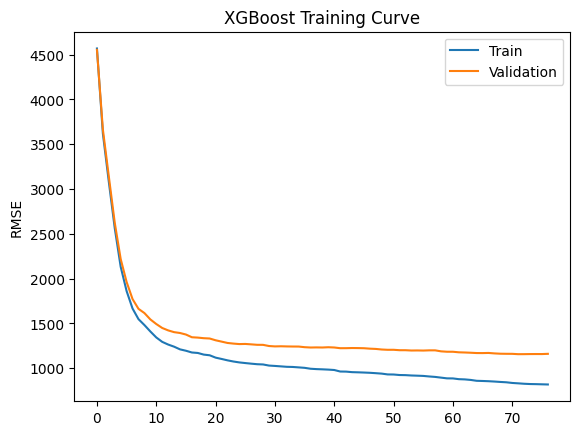

In [138]:
# check overfitting
results = result.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost Training Curve')
plt.show()

In [139]:
def evaluate_performance(y_pred, y_actual, regression=False):
    if regression==False:
        print(f"precision is {precision_score(y_actual, y_pred)}")
        print(f"recall is {recall_score(y_actual, y_pred)}")
        print(f"accuracy is {accuracy_score(y_actual, y_pred)}")
        print(f"f1 score is {f1_score(y_actual, y_pred)}")
    else:
        print(f"MSE is { mean_squared_error(y_actual, y_pred, squared=True)}")
        print(f"RMSE is { mean_squared_error(y_actual, y_pred, squared=False)}")
        print(f"NRMSE is { mean_squared_error(y_actual, y_pred, squared=False)/(y_actual.max() - y_actual.min()) }")
        print(f"MAPE is { mean_absolute_percentage_error(y_actual, y_pred)}")

In [140]:
evaluate_performance(model.predict(X_train), y_train, True)

MSE is 692273.685370763
RMSE is 832.0298584610789
NRMSE is Y    0.043279
dtype: float64
MAPE is 3.032310472092204e+17


## <font color="green"> Explore Overall Feature Importance

In [141]:
# # plot the feature importance
# feature_imp = pd.DataFrame(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[0], reverse=True), columns=['Feature', 'Value'])
# fig, ax = plt.subplots()

# data = feature_imp.sort_values(by="Value", ascending=False).head(100)
# fig.set_size_inches(18.5, 10.5)

# sns.barplot(x="Value", y="Feature", data=data)
# ax.set_title('Feature Importance By Weight')
# ax.set_xlabel('importance score')
# ax.set_ylabel('features')
# ax.yaxis.set_visible(True)
# ax.xaxis.set_visible(True)
# fig.patch.set_facecolor('white')
# # plt.savefig(f'../data/feature_importance_by_weight.png', bbox_inches='tight')

In [142]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

[10:27:51] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [143]:
# shap.summary_plot(shap_values.values, X_train, plot_type="bar", max_display=20, show=False, plot_size=[10,10])
# plt.title("Feature Importance", fontsize=15, color="black")

Text(0.5, 1.0, 'SHAP Plot')

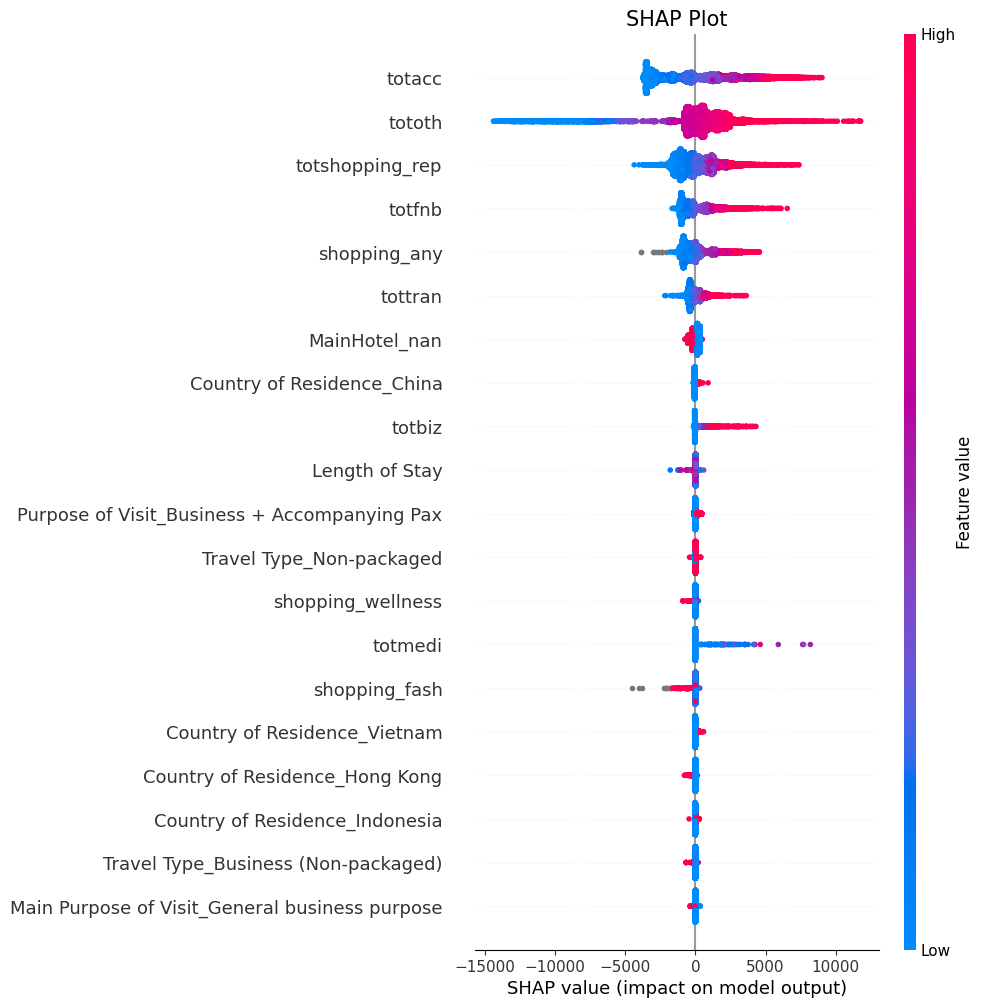

In [144]:
shap.summary_plot(shap_values.values, X_train, max_display=20, show=False, plot_type="dot", plot_size=[10,10])
plt.title("SHAP Plot", fontsize=15, color="black")

In [145]:
# as this variable is binary, so the SHAP value are all accumulated at a small area.
X_train.MainHotel_nan.value_counts()

MainHotel_nan
0.0    13003
1.0     5376
Name: count, dtype: int64

<font color = "yellow"> 1. Accomodation expenditure is the most determining fator for visitors' spending in Singapore. If the visitor did not specify their hotel, probably they stay at some relative's or friend's houses with less total spending. <br>2. 

## <font color = "green"> Explore Specific Variables

In [118]:
# normalize the total spend
df_ohe_ = df_ohe.copy(deep=True)
df_ohe_["normalized_spend"] = df_ohe_.apply(lambda x: x[target_name]/(x["Length of Stay"] + 1), axis=1)
df_ohe_.head()

case  year  Weights_QTR  Length of Stay  shopping_fash  shopping_jewllery  \
0   1.0  2018   660.046512               6            0.0                0.0   
1   2.0  2018   433.217949              50            0.0                0.0   
2   3.0  2018   335.125000               6         4000.0                0.0   
3   4.0  2018   490.977273               7           75.0                0.0   
4   5.0  2018   379.800000               2         2000.0                0.0   

   shopping_watches  shopping_wellness  shopping_food  shopping_gifts  \
0               0.0                0.0            0.0            75.0   
1               0.0                0.0            0.0             0.0   
2               0.0                0.0            0.0             0.0   
3              37.5               50.0           50.0            37.5   
4               0.0                0.0            0.0             0.0   

   shopping_consumertech  shopping_antiques  shopping_others  shopping_any  \
0                    0.0                0.0              0.0          75.0   
1                    0.0                0.0              0.0           0.0   
2                    0.0                0.0              0.0        4000.0   
3                    0.0                0.0              0.0         250.0   
4                    0.0                0.0              0.0        2000.0   

    totacc  totfnb  tottran  totbiz  totedu  totmedi  tototh  totshopping_rep  \
0   880.68  234.79    29.35     0.0     0.0      0.0  234.38           101.70   
1     0.00   18.31    14.09     0.0     0.0      0.0   40.00            26.70   
2     0.00  969.22   242.30     0.0     0.0      0.0    0.00          4074.75   
3     0.00  125.78   125.78     0.0     0.0      0.0  146.24           276.70   
4  1101.81  734.54   275.45     0.0     0.0      0.0    0.00          2070.75   

   tot.exp  c4a_1  Travel companion - Alone  Travel companion - Spouse  \
0  1480.90      1                         0                          1   
1    99.10      0                         1                          0   
2  5286.27      0                         1                          0   
3   674.50      0                         0                          1   
4  4182.55      1                         1                          0   

   Travel companion - Your Child/Children  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   Travel companion - Parents/Parents-in-law  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Travel companion - Grandparents/Grandparents-in-law  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Travel companion - Siblings  Travel companion - Other relatives  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   Travel companion - Friends  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           0   

   Travel companion - Business associates/Colleagues  \
0                                                  0   
1                                        

#### <font color = "green"> Explore total expenses

In [121]:
# prepare df
total_spends = [n for n in df_ohe_.columns.tolist() if n.startswith("to")]
df_tot = df_ohe_.loc[:, total_spends + ["normalized_spend"]]
df_tot.head()

,totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,normalized_spend
0,880.68,234.79,29.35,0.0,0.0,0.0,234.38,101.70,1480.90,211.557143
1,0.00,18.31,14.09,0.0,0.0,0.0,40.00,26.70,99.10,1.943137
2,0.00,969.22,242.30,0.0,0.0,0.0,0.00,4074.75,5286.27,755.181429
3,0.00,125.78,125.78,0.0,0.0,0.0,146.24,276.70,674.50,84.312500
4,1101.81,734.54,275.45,0.0,0.0,0.0,0.00,2070.75,4182.55,1394.183333


[10:24:34] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Plot - Total Spends')

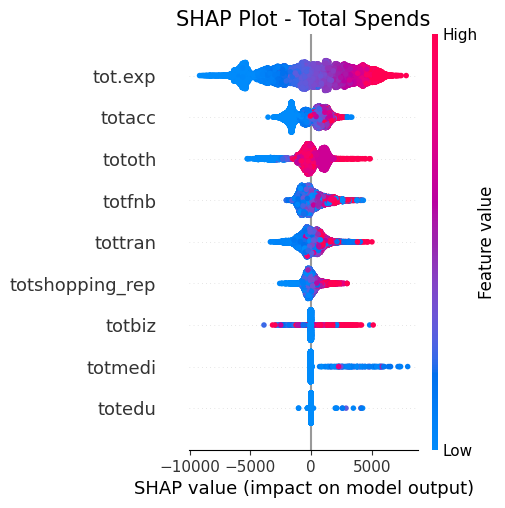

In [122]:
# train model
Y = pd.DataFrame(le.fit_transform(df_tot["normalized_spend"]), columns=["Y"])
X = df_tot.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, plot_type="dot", plot_size=[5,5])
plt.title("SHAP Plot - Total Spends", fontsize=15, color="black")

<font color="yellow"> Explore spending and visitors' info

#### <font color = "green"> Explore shoppings

In [123]:
# prepare df
shopping_spends = [n for n in df_ohe_.columns.tolist() if n.startswith("shopping_")]
df_shopp = df_ohe_.loc[:, shopping_spends + ["normalized_spend"]]
df_shopp.head()

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any,normalized_spend
0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,75.0,211.557143
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.943137
2,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,755.181429
3,75.0,0.0,37.5,50.0,50.0,37.5,0.0,0.0,0.0,250.0,84.312500
4,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1394.183333


[10:26:03] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Plot - Shopping Spends')

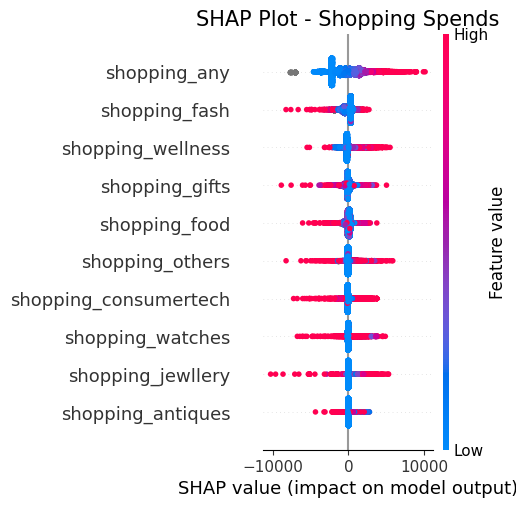

In [124]:
# train model
Y = pd.DataFrame(le.fit_transform(df_shopp["normalized_spend"]), columns=["Y"])
X = df_shopp.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, plot_type="dot", plot_size=[5,5])
plt.title("SHAP Plot - Shopping Spends", fontsize=15, color="black")

#### <font color = "green"> Explore Country of Residence

In [146]:
# prepare df
countries = [n for n in df_ohe_.columns.tolist() if n.startswith("Country of Residence_")]
df_country = df_ohe_.loc[:, countries + ["normalized_spend"]]
df_country.head()

,Country of Residence_Afghanistan,Country of Residence_Algeria,Country of Residence_Argentina,Country of Residence_Australia,Country of Residence_Austria,Country of Residence_Azerbaijan,Country of Residence_Bahrain,Country of Residence_Bangladesh,Country of Residence_Belgium,Country of Residence_Bosnia and Herzegovina,Country of Residence_Brazil,Country of Residence_Brunei Darussalam,Country of Residence_Cambodia,Country of Residence_Canada,Country of Residence_Chile,Country of Residence_China,Country of Residence_Colombia,Country of Residence_Cook Islands,Country of Residence_Croatia,Country of Residence_Cyprus,Country of Residence_Czech Republic,Country of Residence_Denmark,Country of Residence_Egypt,Country of Residence_Equatorial Guinea,Country of Residence_Estonia,Country of Residence_Ethiopia,Country of Residence_Fiji,Country of Residence_Finland,Country of Residence_France,Country of Residence_Georgia,Country of Residence_Germany,Country of Residence_Ghana,Country of Residence_Greece,Country of Residence_Guatemala,Country of Residence_Haiti,Country of Residence_Hong Kong,Country of Residence_Hungary,Country of Residence_Iceland,Country of Residence_India,Country of Residence_Indonesia,Country of Residence_Iran,Country of Residence_Iraq,Country of Residence_Ireland,Country of Residence_Israel,Country of Residence_Italy,Country of Residence_Jamaica,Country of Residence_Japan,Country of Residence_Jordan,Country of Residence_Kazakhstan,Country of Residence_Kenya,Country of Residence_Kuwait,Country of Residence_Laos,Country of Residence_Latvia,Country of Residence_Lebanon,Country of Residence_Libya,Country of Residence_Lithuania,Country of Residence_Luxembourg,Country of Residence_Macau,Country of Residence_Madagascar,Country of Residence_Malawi,Country of Residence_Malaysia,Country of Residence_Maldives,Country of Residence_Mauritania,Country of Residence_Mauritius,Country of Residence_Mexico,Country of Residence_Monaco,Country of Residence_Mongolia,Country of Residence_Morocco,Country of Residence_Mozambique,Country of Residence_Myanmar,Country of Residence_Namibia,Country of Residence_Nepal,Country of Residence_Netherlands,Country of Residence_New Zealand,Country of Residence_Nigeria,Country of Residence_North Korea,Country of Residence_Norway,Country of Residence_Oman,Country of Residence_Others,Country of Residence_Pakistan,Country of Residence_Papua New Guinea,Country of Residence_Peru,Country of Residence_Philippines,Country of Residence_Poland,Country of Residence_Portugal,Country of Residence_Qatar,Country of Residence_Reunion,Country of Residence_Romania,Country of Residence_Russia,Country of Residence_Sao Tome and Principe,Country of Residence_Saudi Arabia,Country of Residence_Senegal,Country of Residence_Slovakia,Country of Residence_Slovenia,Country of Residence_Solomon Islands,Country of Residence_South Africa,Country of Residence_South Korea,Country of Residence_Spain,Country of Residence_Sri Lanka,Country of Residence_Sweden,Country of Residence_Switzerland,Country of Residence_Syria,Country of Residence_Taiwan,Country of Residence_Tanzania,Country of Residence_Thailand,Country of Residence_Timor-Leste,Country of Residence_Turkey,Country of Residence_Uganda,Country of Residence_Ukraine,Country of Residence_United Arab Emirates,Country of Residence_United Kingdom,Country of Residence_United States,Country of Residence_Uzbekistan,Country of Residence_Vanuatu,Country of Residence_Venezuela,Country of Residence_Vietnam,Country of Residence_Western Samoa,Country of Residence_Yemen,Country of Residence_Zimbabwe,normalized_spend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

[10:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Plot - Country Of Residence')

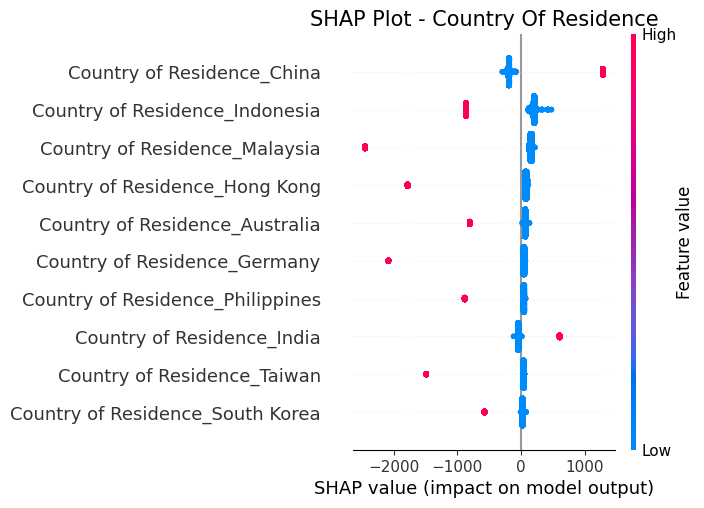

In [152]:
# train model
Y = pd.DataFrame(le.fit_transform(df_country["normalized_spend"]), columns=["Y"])
X = df_country.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, max_display=10, plot_type="dot", plot_size=[7,5])
plt.title("SHAP Plot - Country Of Residence", fontsize=15, color="black")

<font color="yellow"> Findings: <br>1. Visitors from China tend to spend more than the rest with higher chance. <br>2. Visitors from Malaysia and Indonesia tend to spend less. This can be understood because they are nearer to SG and have similar culture, and their currency to SGD is lower, thus they can buy most of the goods at their homeland. 

In [194]:
# look into the shopping patterns
display("Shopping Pattern for Male Visitors from China:", df_ohe_.loc[(df_ohe_["Country of Residence_China"] == 1) & (df_ohe_["Gender_Male"] == 1), shopping_spends].head().describe())
display("Shopping Pattern for Female Visitors from China:", df_ohe_.loc[(df_ohe_["Country of Residence_China"] == 1) & (df_ohe_["Gender_Female"] == 1), shopping_spends].head().describe())


'Shopping Pattern for Male Visitors from China:'

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any
count,5.0,5.0,5.0,5.000000,5.000000,5.00000,5.0,5.0,5.000000,5.000000
mean,0.0,0.0,0.0,65.600000,34.000000,20.00000,0.0,0.0,28.000000,147.600000
std,0.0,0.0,0.0,131.593313,47.749346,44.72136,0.0,0.0,38.340579,153.684092
min,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,70.000000
50%,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,98.000000
75%,0.0,0.0,0.0,28.000000,70.000000,0.00000,0.0,0.0,70.000000,170.000000
max,0.0,0.0,0.0,300.000000,100.000000,100.00000,0.0,0.0,70.000000,400.000000


'Shopping Pattern for Female Visitors from China:'

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any
count,5.000000,5.0,5.0,5.0,5.0,5.0,5.000000,5.0,5.0,5.000000
mean,32.000000,0.0,0.0,0.0,0.0,0.0,100.000000,0.0,0.0,132.000000
std,71.554175,0.0,0.0,0.0,0.0,0.0,223.606798,0.0,0.0,295.160973
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
max,160.000000,0.0,0.0,0.0,0.0,0.0,500.000000,0.0,0.0,660.000000


<font color="yellow"> We can send marketing related to wellness to China Male visitors, and send marketing related to consumer tech and fashion to Female visitors.

#### <font color = "green"> Explore Hotels

In [166]:
# prepare df
hotel = [n for n in df_ohe_.columns.tolist() if n.startswith("MainHotel_")]
df_hotel = df_ohe_.loc[:, hotel + ["normalized_spend"]]
df_hotel.head()

,MainHotel_1.0,MainHotel_2.0,MainHotel_3.0,MainHotel_4.0,MainHotel_6.0,MainHotel_7.0,MainHotel_8.0,MainHotel_9.0,MainHotel_10.0,MainHotel_11.0,MainHotel_12.0,MainHotel_13.0,MainHotel_14.0,MainHotel_15.0,MainHotel_16.0,MainHotel_17.0,MainHotel_19.0,MainHotel_20.0,MainHotel_23.0,MainHotel_24.0,MainHotel_25.0,MainHotel_26.0,MainHotel_27.0,MainHotel_28.0,MainHotel_29.0,MainHotel_30.0,MainHotel_31.0,MainHotel_32.0,MainHotel_33.0,MainHotel_34.0,MainHotel_36.0,MainHotel_37.0,MainHotel_38.0,MainHotel_39.0,MainHotel_41.0,MainHotel_42.0,MainHotel_43.0,MainHotel_44.0,MainHotel_45.0,MainHotel_46.0,MainHotel_47.0,MainHotel_48.0,MainHotel_49.0,MainHotel_51.0,MainHotel_52.0,MainHotel_53.0,MainHotel_54.0,MainHotel_55.0,MainHotel_56.0,MainHotel_57.0,MainHotel_58.0,MainHotel_59.0,MainHotel_61.0,MainHotel_63.0,MainHotel_64.0,MainHotel_65.0,MainHotel_66.0,MainHotel_67.0,MainHotel_68.0,MainHotel_69.0,MainHotel_70.0,MainHotel_71.0,MainHotel_72.0,MainHotel_73.0,MainHotel_74.0,MainHotel_75.0,MainHotel_76.0,MainHotel_77.0,MainHotel_78.0,MainHotel_79.0,MainHotel_80.0,MainHotel_81.0,MainHotel_82.0,MainHotel_83.0,MainHotel_84.0,MainHotel_85.0,MainHotel_86.0,MainHotel_87.0,MainHotel_88.0,MainHotel_89.0,MainHotel_91.0,MainHotel_92.0,MainHotel_93.0,MainHotel_97.0,MainHotel_202.0,MainHotel_203.0,MainHotel_204.0,MainHotel_206.0,MainHotel_208.0,MainHotel_210.0,MainHotel_211.0,MainHotel_212.0,MainHotel_213.0,MainHotel_215.0,MainHotel_216.0,MainHotel_219.0,MainHotel_220.0,MainHotel_221.0,MainHotel_222.0,MainHotel_225.0,MainHotel_228.0,MainHotel_229.0,MainHotel_230.0,MainHotel_232.0,MainHotel_233.0,MainHotel_234.0,MainHotel_236.0,MainHotel_237.0,MainHotel_238.0,MainHotel_241.0,MainHotel_242.0,MainHotel_249.0,MainHotel_250.0,MainHotel_251.0,MainHotel_252.0,MainHotel_253.0,MainHotel_255.0,MainHotel_256.0,MainHotel_258.0,MainHotel_260.0,MainHotel_261.0,MainHotel_263.0,MainHotel_265.0,MainHotel_267.0,MainHotel_271.0,MainHotel_272.0,MainHotel_273.0,MainHotel_274.0,MainHotel_275.0,MainHotel_276.0,MainHotel_277.0,MainHotel_278.0,MainHotel_279.0,MainHotel_280.0,MainHotel_281.0,MainHotel_282.0,MainHotel_283.0,MainHotel_286.0,MainHotel_289.0,MainHotel_290.0,MainHotel_291.0,MainHotel_292.0,MainHotel_293.0,MainHotel_294.0,MainHotel_295.0,MainHotel_300.0,MainHotel_301.0,MainHotel_302.0,MainHotel_303.0,MainHotel_304.0,MainHotel_307.0,MainHotel_309.0,MainHotel_312.0,MainHotel_313.0,MainHotel_314.0,MainHotel_316.0,MainHotel_321.0,MainHotel_323.0,MainHotel_325.0,MainHotel_327.0,MainHotel_329.0,MainHotel_330.0,MainHotel_332.0,MainHotel_333.0,MainHotel_334.0,MainHotel_339.0,MainHotel_342.0,MainHotel_348.0,MainHotel_351.0,MainHotel_352.0,MainHotel_354.0,MainHotel_356.0,MainHotel_358.0,MainHotel_361.0,MainHotel_364.0,MainHotel_365.0,MainHotel_366.0,MainHotel_367.0,MainHotel_369.0,MainHotel_370.0,MainHotel_375.0,MainHotel_376.0,MainHotel_382.0,MainHotel_383.0,MainHotel_386.0,MainHotel_387.0,MainHotel_389.0,MainHotel_390.0,MainHotel_391.0,MainHotel_394.0,MainHotel_397.0,MainHotel_398.0,MainHotel_402.0,MainHotel_405.0,MainHotel_407.0,MainHotel_408.0,MainHotel_412.0,MainHotel_417.0,MainHotel_421.0,MainHotel_427.0,MainHotel_430.0,MainHotel_431.0,MainHotel_432.0,MainHotel_433.0,MainHotel_434.0,MainHotel_435.0,MainHotel_436.0,MainHotel_437.0,MainHotel_444.0,MainHotel_448.0,MainHotel_450.0,MainHotel_451.0,MainHotel_463.0,MainHotel_464.0,MainHotel_465.0,MainHotel_467.0,MainHotel_468.0,MainHotel_469.0,MainHotel_470.0,MainHotel_471.0,MainHotel_472.0,MainHotel_473.0,MainHotel_474.0,MainHotel_475.0,MainHotel_476.0,MainHotel_477.0,MainHotel_478.0,MainHotel_479.0,MainHotel_480.0,MainHotel_481.0,MainHotel_483.0,MainHotel_599.0,MainHotel_701.0,MainHotel_703.0,MainHotel_704.0,MainHotel_705.0,MainHotel_706.0,MainHotel_707.0,MainHotel_711.0,MainHotel_713.0,MainHotel_714.0,MainHotel_715.0,MainHotel_716.0,MainHotel_718.0,MainHotel_719.0,MainHotel_720.0,MainHotel_721.0,MainHotel_722.0,MainHotel_723.0,MainHotel_724.0,MainHotel_725.0,MainHotel_727.0,MainHotel_728.0,MainHotel_729.0,MainHotel_730.0,MainHotel_7

[10:45:13] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Plot - Hotels')

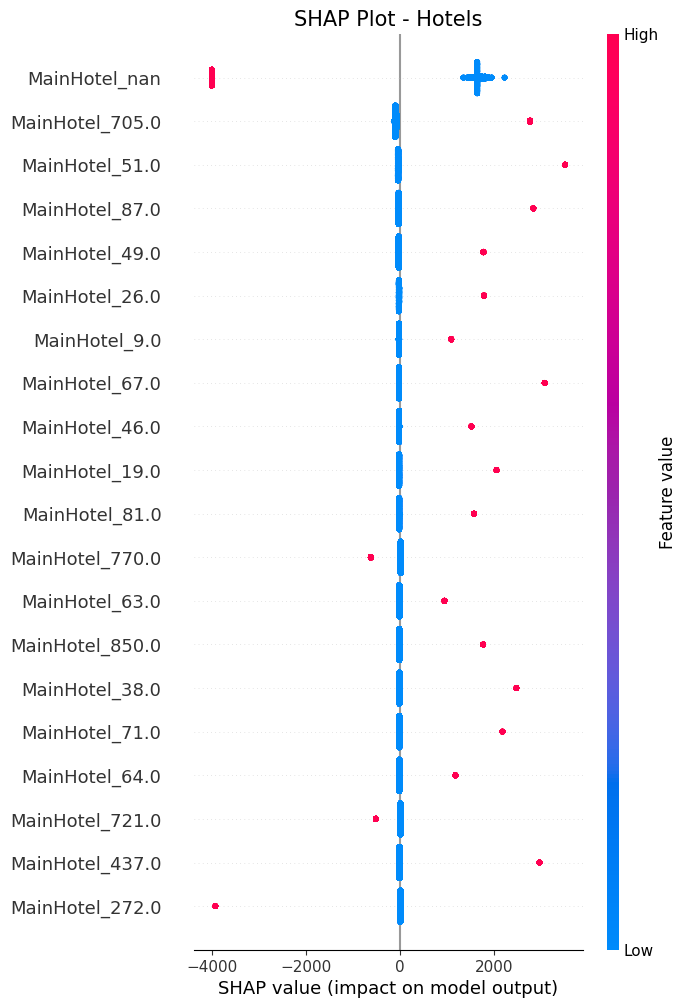

In [167]:
# train model
Y = pd.DataFrame(le.fit_transform(df_hotel["normalized_spend"]), columns=["Y"])
X = df_hotel.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, max_display=20, plot_type="dot", plot_size=[7,10])
plt.title("SHAP Plot - Hotels", fontsize=15, color="black")

<font color="yellow"> Findings: <br>1. if people did not specify their hotel, probably they stay at friend's house or budget hotel, they tend to spend less<br>2. people who stayed at hotel Marina Bay Sands Singapore, Mandarin Orchard Singapore, The Pan Pacific Hotel Singapore have higher chance to spend more in Singapore. We can therefore look into the statistics of those visitors, and do targeted marketing to them, offer them some shopping vouchers, flyers or messages for certain shoppings.

In [190]:
# check stats of visitors staying at Marina Bay Sands
display("Shopping Pattern for Male Visitors Staying at Marina Bay Sands:", df_ohe_.loc[(df_ohe_["MainHotel_705.0"] == 1) & (df_ohe_["Gender_Male"] == 1), shopping_spends].head().describe())
display("Shopping Pattern for Female Visitors Staying at Marina Bay Sands:", df_ohe_.loc[(df_ohe_["MainHotel_705.0"] == 1) & (df_ohe_["Gender_Female"] == 1), shopping_spends].head().describe())

'Shopping Pattern for Male Visitors Staying at Marina Bay Sands:'

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any
count,5.000000,5.0,5.0,5.000000,5.00000,5.000000,5.0,5.0,5.0,5.000000
mean,12.000000,0.0,0.0,13.000000,7.50000,14.500000,0.0,0.0,0.0,47.000000
std,21.679483,0.0,0.0,18.574176,16.77051,20.645823,0.0,0.0,0.0,47.644517
min,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,20.000000
50%,0.000000,0.0,0.0,0.000000,0.00000,10.000000,0.0,0.0,0.0,40.000000
75%,10.000000,0.0,0.0,25.000000,0.00000,12.500000,0.0,0.0,0.0,50.000000
max,50.000000,0.0,0.0,40.000000,37.50000,50.000000,0.0,0.0,0.0,125.000000


'Shopping Pattern for Female Visitors Staying at Marina Bay Sands:'

,shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any
count,5.00000,5.0,5.0,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.000000
mean,30.00000,0.0,0.0,27.000000,59.333333,28.666667,0.0,0.0,0.0,145.000000
std,44.72136,0.0,0.0,38.987177,56.440726,18.043158,0.0,0.0,0.0,99.121138
min,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,30.000000
25%,0.00000,0.0,0.0,0.000000,30.000000,30.000000,0.0,0.0,0.0,100.000000
50%,0.00000,0.0,0.0,0.000000,50.000000,30.000000,0.0,0.0,0.0,145.000000
75%,50.00000,0.0,0.0,50.000000,66.666667,33.333333,0.0,0.0,0.0,150.000000
max,100.00000,0.0,0.0,85.000000,150.000000,50.000000,0.0,0.0,0.0,300.000000


<font color="yellow"> We looked into Male and Females staying at MBS, we can send marketing related to gifts (based on mean value) to Male visitors, and marketing related to food and fashion to Female visitors.

#### <font color = "green"> Explore Visiting Purpose

In [160]:
# prepare df
purpose = [n for n in df_ohe_.columns.tolist() if n.startswith("Main Purpose of Visit_")]
df_purpose = df_ohe_.loc[:, purpose + ["normalized_spend"]]
df_purpose.head()

,Main Purpose of Visit_Accompanying a healthcare/ medical visitor for In-patient,Main Purpose of Visit_Accompanying a business visitor,Main Purpose of Visit_Accompanying a healthcare/ medical visitor for Day-surgery,Main Purpose of Visit_Accompanying a healthcare/ medical visitor for Outpatient,Main Purpose of Visit_Accompanying an international student (relative or friend),Main Purpose of Visit_Company sponsored holiday/incentive programme (a. Venue of,Main Purpose of Visit_Convention/ conference,Main Purpose of Visit_Corporate/ business meetings (a. Venue of corporate/,Main Purpose of Visit_Cultural Festivals (e.g. Lunar New Year_ Deepavali_ Hari,Main Purpose of Visit_Day-surgery (with no hospitalization),Main Purpose of Visit_Executive training_ including training workshops and,Main Purpose of Visit_Exhibition/ trade show,Main Purpose of Visit_Family Entertainment (e.g. kid’s music & theatre_ ice/ magic,Main Purpose of Visit_Gather information/ facts on the education services in,Main Purpose of Visit_Gather information/ facts on the healthcare services in,Main Purpose of Visit_General business purpose,Main Purpose of Visit_Holiday/ Rest & Relax,Main Purpose of Visit_In-house company training (Name of company),Main Purpose of Visit_In-patient (hospitalization) treatment,Main Purpose of Visit_Job Opportunities,Main Purpose of Visit_Music-related (e.g. concerts_ festivals_ etc) Event name,Main Purpose of Visit_Others (e.g. leisure exhibitions_ cinema_ recreational,Main Purpose of Visit_Others - Personal (e.g. weddings_ funerals_ etc),Main Purpose of Visit_Others - Work Related (e.g. visa_ insurance_ etc),Main Purpose of Visit_Others_ please specify,Main Purpose of Visit_Outpatient consultation/ treatment (e.g. with General,Main Purpose of Visit_Partying at clubs/ pubs/ dance parties (e.g. Avalon &,Main Purpose of Visit_Performing Arts (e.g. musicals_ theatre_ dance_ opera_ etc),Main Purpose of Visit_Personal Enrichment (cooking_ batik painting class_ etc),Main Purpose of Visit_Pls specify,Main Purpose of Visit_School trips,Main Purpose of Visit_Sightseeing/ Attractions,Main Purpose of Visit_Skills development/ skills training/ vocational training,Main Purpose of Visit_Sporting (e.g. rugby matches_ marathons_ golf tournaments_,Main Purpose of Visit_Stopover (a planned stop of at least one night),Main Purpose of Visit_Student enrichment programmes (e.g. language courses_ camps_,Main Purpose of Visit_Student events (e.g. sports & other competitions_ music,Main Purpose of Visit_Study mission (including government study trips),Main Purpose of Visit_To experience different cultures,Main Purpose of Visit_To experience the food/ food events in Singapore Event name,Main Purpose of Visit_To experience the nightlife in Singapore (e.g. all late,Main Purpose of Visit_To shop/ attend shopping events in Singapore Event name,Main Purpose of Visit_To take or join a regional or international cruise,Main Purpose of Visit_To visit the integrated resorts(e.g. Marina Bay Sands_,Main Purpose of Visit_Using Singapore as a hub to go to other destinations:,Main Purpose of Visit_Using Singapore as a hub to go to other destinations: Stop,Main Purpose of Visit_Visiting an international student (relative or friend),Main Purpose of Visit_Visiting friends/ relatives (who are not international,normalized_spend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.557143
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.943137
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.181429
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

[10:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


Text(0.5, 1.0, 'SHAP Plot - Purpose Of Visit')

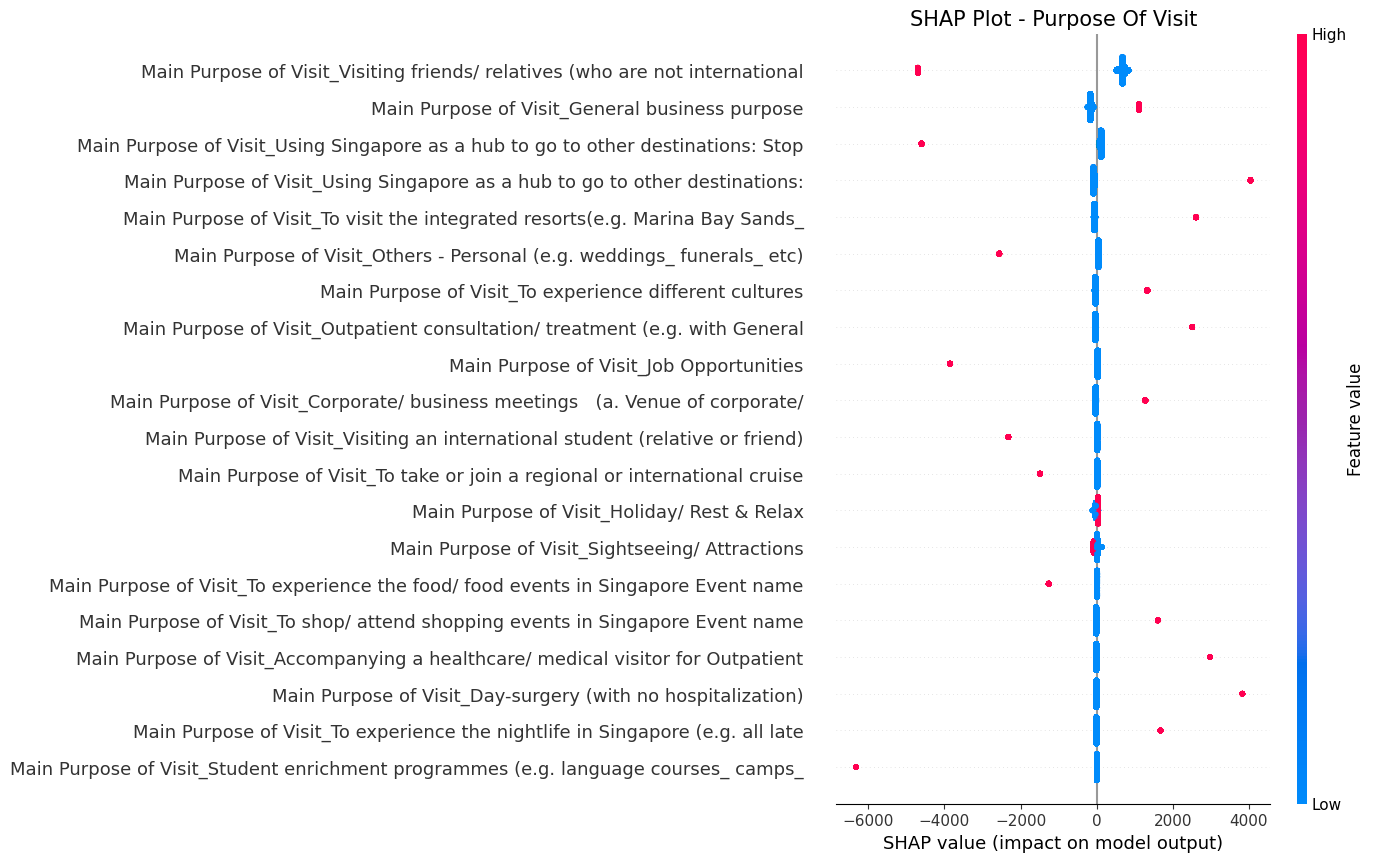

In [163]:
# train model
Y = pd.DataFrame(le.fit_transform(df_purpose["normalized_spend"]), columns=["Y"])
X = df_purpose.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, max_display=20, plot_type="dot", plot_size=[7,10])
plt.title("SHAP Plot - Purpose Of Visit", fontsize=15, color="black")

<font color="yellow"> Findings: <br>1. travlling with relative, attending weddings, exchange students, cruise, food-lovers tend to spend less<br>2. businessmen, shoppers, healthcare patient, nighlife seeker tend to spend more.

#### <font color = "green"> Explore Occupations

In [171]:
# prepare df
occupation = [n for n in df_ohe_.columns.tolist() if n.startswith("Occupation")]
df_occupation = df_ohe_.loc[:, occupation + ["normalized_spend"]]
df_occupation.head()

,Occupation_Blue collar (technician_ hairdresser_ hawker_ taxi drivers,Occupation_Businessman (large company_ > 250 people),Occupation_Businessman (medium size company_ 50 -250 people),Occupation_Businessman (small company_ _50 people),Occupation_Executive (sales_ administration),Occupation_Homemaker (full time),Occupation_Manager (CEO_ company director_ senior manager),Occupation_Other White collar (teacher_ nurse_ secretary_,Occupation_Others (specify),Occupation_Professionals (doctor_ lawyer_ lecturer_ etc),Occupation_Retired,Occupation_Student,Occupation_Unemployed,Occupation.1_999,Occupation.1_Accommodation and Food & Beverage-related activities,Occupation.1_Administrative and Support Service Activities,Occupation.1_Agriculture and Fishing,Occupation.1_Construction,Occupation.1_Defence and Security,Occupation.1_Design related activities (e.g. architecture_ interior_,Occupation.1_Education,Occupation.1_Electronics & Precision Engineering,Occupation.1_Environment and Energy,Occupation.1_Financial and Insurance Activities,Occupation.1_Healthcare and Biomedical Sciences,Occupation.1_Hospitality_ Travel & Tourism,Occupation.1_InfoComm Technology,Occupation.1_Manufacturing and Chemicals,Occupation.1_Marketing & Media,Occupation.1_Mining and Quarrying,Occupation.1_Others (specify),Occupation.1_Professional_ Scientific and Technical Activities,Occupation.1_Public Administration,Occupation.1_Real Estate Activities,Occupation.1_Sciences and Engineering,Occupation.1_Social Sector,Occupation.1_Sports and Recreation,Occupation.1_Transportation and Logistics,Occupation.1_Wholesale and Retail Trade,Occupation.1_nan,normalized_spend
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,211.557143
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.943137
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755.181429
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84.312500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1394.183333


[11:00:13] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Plot - Occupation')

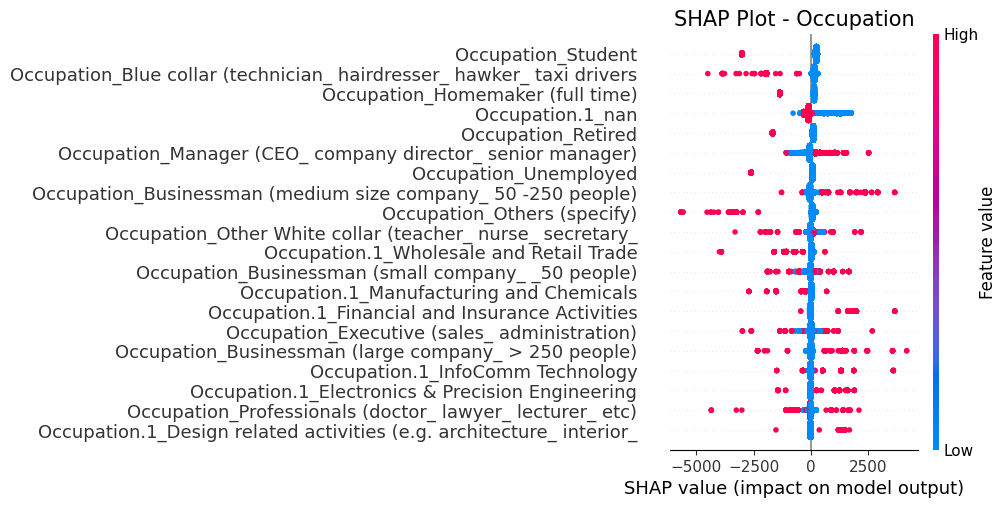

In [173]:
# train model
Y = pd.DataFrame(le.fit_transform(df_occupation["normalized_spend"]), columns=["Y"])
X = df_occupation.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, max_display=20, plot_type="dot", plot_size=[10,5])
plt.title("SHAP Plot - Occupation", fontsize=15, color="black")

<font color="yellow"> Findings: <br>1. students, taxi-drivers, homemakers, retired, unemployed tend to spend less. <br>2. managers, businessmen tend to spend more.

#### <font color = "green"> Explore Travel companion

In [175]:
# prepare df
travel = [n for n in df_ohe_.columns.tolist() if n.startswith("Travel companion")]
df_travel = df_ohe_.loc[:, travel + ["normalized_spend"]]
df_travel.head()

,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others,normalized_spend
0,0,1,0,0,0,0,0,0,0,0,211.557143
1,1,0,0,0,0,0,0,0,0,0,1.943137
2,1,0,0,0,0,0,0,0,0,0,755.181429
3,0,1,1,0,0,0,0,0,0,0,84.312500
4,1,0,0,0,0,0,0,0,0,0,1394.183333


[12:26:42] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Plot - Travel')

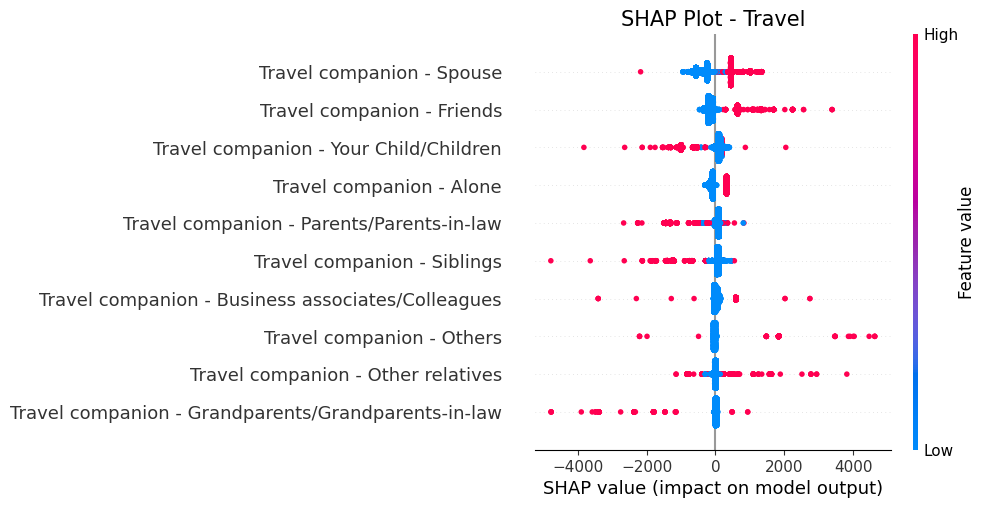

In [176]:
# train model
Y = pd.DataFrame(le.fit_transform(df_travel["normalized_spend"]), columns=["Y"])
X = df_travel.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, max_display=20, plot_type="dot", plot_size=[10,5])
plt.title("SHAP Plot - Travel", fontsize=15, color="black")

<font color="yellow"> Findings: <br>1. people travelled alone or with spouse, friends tend to spend more. <br>2. people travelled with children, parents, siblings tend to spend less. 

#### <font color = "green"> Explore The Rest

In [169]:
# prepare df
total_spends = [n for n in df_ohe_.columns.tolist() if n.startswith("to")]
shopping_spends = [n for n in df_ohe_.columns.tolist() if n.startswith("shopping_")]
countries = [n for n in df_ohe_.columns.tolist() if n.startswith("Country of Residence_")]
hotel = [n for n in df_ohe_.columns.tolist() if n.startswith("MainHotel_")]
purpose = [n for n in df_ohe_.columns.tolist() if n.startswith("Main Purpose of Visit_")]
occupation = [n for n in df_ohe_.columns.tolist() if n.startswith("Occupation")]

# some of the columns that I have not explored in details, which could be studied further moving forward
city = [n for n in df_ohe_.columns.tolist() if n.startswith("City of Residence_")]
designation = [n for n in df_ohe_.columns.tolist() if n.startswith("Designation")]
purpose_of_visit = [n for n in df_ohe_.columns.tolist() if n.startswith("Purpose of Visit")]

rest = [n for n in df_ohe_.columns if n not in total_spends + shopping_spends + countries + hotel + purpose + city + occupation + designation + purpose_of_visit]

df_rest = df_ohe_.loc[:, rest]
df_rest.head()

,case,year,Weights_QTR,Length of Stay,c4a_1,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Air_Terminal_1.0,Air_Terminal_2.0,Air_Terminal_3.0,Air_Terminal_nan,Sea_Terminal_Harbourfront Cruise,Sea_Terminal_Harbourfront Ferry,Sea_Terminal_MBCCS,Sea_Terminal_Tanah Merah Ferry,Sea_Terminal_nan,Land_Terminal_Others_ please specify,Land_Terminal_Tuas Checkpoint,Land_Terminal_Woodlands Checkpoint,Land_Terminal_nan,First Visit To Singapore_No,First Visit To Singapore_Yes,Travel Type_Business (Non-packaged),Travel Type_Non-packaged,Travel Type_Packaged,Gender_Female,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Refused,Marital Status_Single,Marital Status_Widowed,Other Designation_999,Other Designation_Board of Directors,Other Designation_CEO/ Assistant CEO,Other Designation_Chairman,Other Designation_Clerk/ Secretary/ Personal Assistant,Other Designation_Deputy/ Assistant Director,Other Designation_Director,Other Designation_General Manager,Other Designation_Junior Executive,Other Designation_Manager/ Assistant Manager,Other Designation_Others (specify),Other Designation_President/ Vice-President,Other Designation_Senior Executive,Other Designation_nan,normalized_spend
0,1.0,2018,660.046512,6,1,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,211.557143
1,2.0,2018,433.217949,50,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.943137
2,3.0,2018,335.125000,6,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,755.181429
3,4.0,2018,490.977273,7,0,0,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84.312500
4,5.0,2018,379.800000,2,1,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1394.183333


[10:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Text(0.5, 1.0, 'SHAP Plot - Other Features')

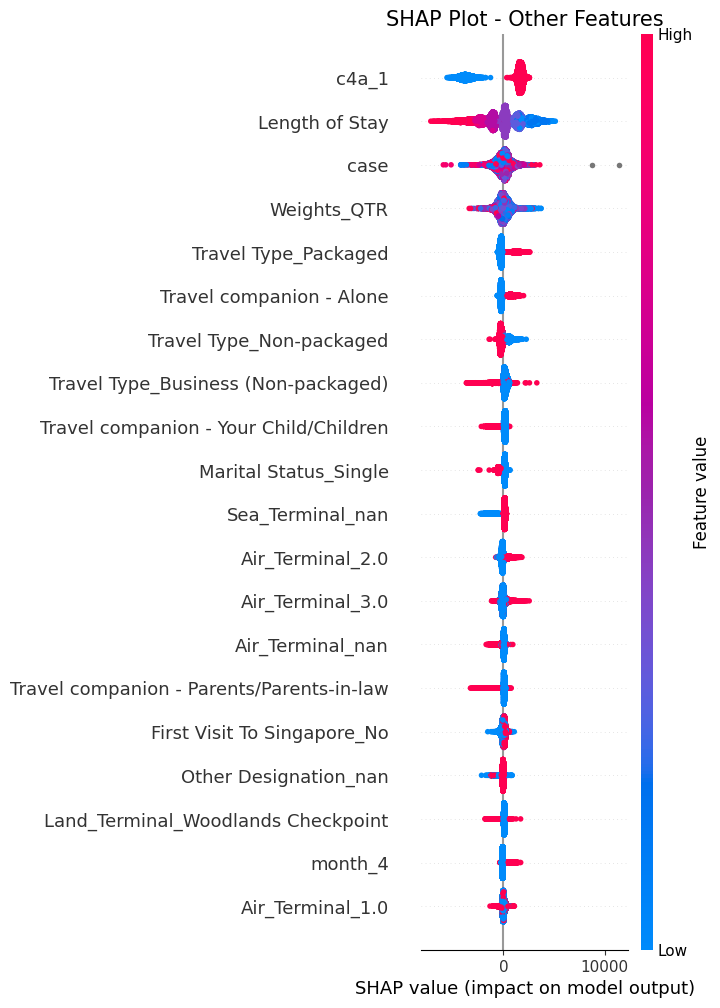

In [170]:
# train model
Y = pd.DataFrame(le.fit_transform(df_rest["normalized_spend"]), columns=["Y"])
X = df_rest.drop(["normalized_spend"], axis=1)

# parameters
objective = "reg:squarederror"
n_estimators = 200
tree_method= "auto"
booster = "gbtree"
eval_metric="rmse"

# tuning parameters
eta = 0.3
max_depth = 4
max_leaves = 2**max_depth

# prevent overfitting
min_child_weight = 1
gamma = 0.051
subsample = 0.7
colsample_bytree = 0.5


# Use "hist" for constructing the trees, with early stopping enabled.
model = xgb.XGBRegressor(
    tree_method=tree_method,
    objective=objective,
    n_estimators=n_estimators,
    missing=np.nan,
    booster=booster,
    eta=eta,
    max_depth=max_depth,
    max_leaves=max_leaves,
    min_child_weight=min_child_weight,
    gamma=gamma,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    importance_type="weight"
    )


# Fit the model, val sets are used for early stopping.
result = model.fit(X, Y, verbose=True)

# plot the SHAP graph
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values.values, X, show=False, max_display=20, plot_type="dot", plot_size=[7,10])
plt.title("SHAP Plot - Other Features", fontsize=15, color="black")

<font color="yellow"> Findings: <br>1. People who did not indicate their hotel, probably they can stay at their friend's house, therefore spend less. <br> 2. People staying longer spend more. This tallies with common sense. <br>3. Packaged traveller tend to spend more, this is probably the guide has collaboration with local shopping malls to bring tourists there and shop. <br>4. People travelling alone tend to spend more. <br>5. People came on April tend to spend more.

## <font color = "green"> Explore the correlation between travel companions and choice of hotel

In [196]:
# load in data
df_survey = pd.read_excel("../data/mock survey data 3.xlsx", "data")

# drop irrelevant columns
drop_col = ["case", "year", "c4a_1"]
df_survey = df_survey.drop(drop_col, axis=1)

# convert categorical to str type
categorical_cols = [
    "month",
    "Country of Residence",
    "City of Residence",
    "Purpose of Visit",
    "Main Purpose of Visit",
    "Air_Terminal",
    "Sea_Terminal",
    "Land_Terminal",
    "First Visit To Singapore",
    "Travel Type",
    "Gender",
    "Marital Status",
    "Occupation",
    "Occupation.1",
    "Other Designation",
    "Designation (free text)",
    "MainHotel",
    ]

for name in categorical_cols:
     df_survey[name] = df_survey[name].apply(lambda x: str(x))

df_survey.head()

,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,Land_Terminal,First Visit To Singapore,Length of Stay,Travel Type,Gender,Marital Status,Occupation,Occupation.1,Other Designation,Designation (free text),shopping_fash,shopping_jewllery,shopping_watches,shopping_wellness,shopping_food,shopping_gifts,shopping_consumertech,shopping_antiques,shopping_others,shopping_any,totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,MainHotel,Travel companion - Alone,Travel companion - Spouse,Travel companion - Your Child/Children,Travel companion - Parents/Parents-in-law,Travel companion - Grandparents/Grandparents-in-law,Travel companion - Siblings,Travel companion - Other relatives,Travel companion - Friends,Travel companion - Business associates/Colleagues,Travel companion - Others
0,1,India,Delhi,Leisure,Holiday/ Rest & Relax,660.046512,2.0,nan,nan,Yes,6,Packaged,Male,Married,"Executive (sales, administration)",nan,nan,nan,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,75.0,880.68,234.79,29.35,0.0,0.0,0.0,234.38,101.70,1480.90,15.0,0,1,0,0,0,0,0,0,0,0
1,1,India,Delhi,Leisure,Visiting friends/ relatives (who are not inter...,433.217949,2.0,nan,nan,No,50,Non-packaged,Female,Single,Student,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,18.31,14.09,0.0,0.0,0.0,40.00,26.70,99.10,nan,1,0,0,0,0,0,0,0,0,0
2,1,United Arab Emirates,Dubai,Leisure,General business purpose,335.125000,2.0,nan,nan,No,6,Business (Non-packaged),Male,Single,"Manager (CEO, company director, senior manager)",InfoComm Technology,Manager/ Assistant Manager,nan,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,0.00,969.22,242.30,0.0,0.0,0.0,0.00,4074.75,5286.27,nan,1,0,0,0,0,0,0,0,0,0
3,1,India,Others,Leisure,Holiday/ Rest & Relax,490.977273,2.0,nan,nan,No,7,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",nan,nan,nan,75.0,0.0,37.5,50.0,50.0,37.5,0.0,0.0,0.0,250.0,0.00,125.78,125.78,0.0,0.0,0.0,146.24,276.70,674.50,nan,0,1,1,0,0,0,0,0,0,0
4,1,Canada,Toronto,Business + Accompanying Pax,Visiting an international student (relative or...,379.800000,2.0,nan,nan,Yes,2,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",nan,nan,nan,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1101.81,734.54,275.45,0.0,0.0,0.0,0.00,2070.75,4182.55,30.0,1,0,0,0,0,0,0,0,0,0


In [203]:
# prepare column names
shopping_cols = [n for n in df_survey.columns if n.startswith("shopping_")]
travelling_cols = [n for n in df_survey.columns if n.startswith("Travel companion")]

# convert from onehot back to dummy
companion = df_survey.loc[:, [n for n in df_survey.columns if n.startswith("Travel companion")]]
companion['Travel companion'] = companion.values.argmax(1) + 1
companion.head(10)

shopping = df_survey.loc[:, [n for n in df_survey.columns if n.startswith("shopping_")]]
shopping['shopping'] = shopping.values.argmax(1) + 1

# get the final correlation frame
df_corr = pd.concat([df_survey.drop(shopping_cols + travelling_cols, axis=1), shopping[['shopping']], companion[['Travel companion']]], axis=1)
df_corr.head()

,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,Land_Terminal,First Visit To Singapore,Length of Stay,Travel Type,Gender,Marital Status,Occupation,Occupation.1,Other Designation,Designation (free text),totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,MainHotel,shopping,Travel companion
0,1,India,Delhi,Leisure,Holiday/ Rest & Relax,660.046512,2.0,nan,nan,Yes,6,Packaged,Male,Married,"Executive (sales, administration)",nan,nan,nan,880.68,234.79,29.35,0.0,0.0,0.0,234.38,101.70,1480.90,15.0,6,2
1,1,India,Delhi,Leisure,Visiting friends/ relatives (who are not inter...,433.217949,2.0,nan,nan,No,50,Non-packaged,Female,Single,Student,nan,nan,nan,0.00,18.31,14.09,0.0,0.0,0.0,40.00,26.70,99.10,nan,1,1
2,1,United Arab Emirates,Dubai,Leisure,General business purpose,335.125000,2.0,nan,nan,No,6,Business (Non-packaged),Male,Single,"Manager (CEO, company director, senior manager)",InfoComm Technology,Manager/ Assistant Manager,nan,0.00,969.22,242.30,0.0,0.0,0.0,0.00,4074.75,5286.27,nan,1,1
3,1,India,Others,Leisure,Holiday/ Rest & Relax,490.977273,2.0,nan,nan,No,7,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",nan,nan,nan,0.00,125.78,125.78,0.0,0.0,0.0,146.24,276.70,674.50,nan,10,2
4,1,Canada,Toronto,Business + Accompanying Pax,Visiting an international student (relative or...,379.800000,2.0,nan,nan,Yes,2,Non-packaged,Male,Married,"Professionals (doctor, lawyer, lecturer, etc)",nan,nan,nan,1101.81,734.54,275.45,0.0,0.0,0.0,0.00,2070.75,4182.55,30.0,1,1


In [204]:
# def cramers_V(var1,var2):
#   crosstab =np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Cross table building
#   stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
#   obs = np.sum(crosstab) # Number of observations
#   mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
#   return np.sqrt(stat/(obs*mini))

# # Correlation between Main Hotel and Travel Companion
# cramers_V(df_corr["MainHotel"], df_corr["Travel companion"])

0.19095951226977198

In [208]:
corr = df_corr.phik_matrix(interval_cols=[n for n in df_corr if n not in categorical_cols + ['Travel companion', 'shopping']])
styles = [dict(selector="th",
               props=[('width', '10px')]),
          dict(selector="th.col_heading",
               props=[("writing-mode", "vertical-rl"),
                      ('transform', 'rotateZ(180deg)'),
                      ('height', '100px'),
                      ('vertical-align', 'top')])]

corr.style.background_gradient(cmap='coolwarm', axis=None)

The number of unique values of variable City of Residence is large: 1015. Are you sure this is not an interval variable? Analysis for pairs of variables including City of Residence can be slow.


,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,Land_Terminal,First Visit To Singapore,Length of Stay,Travel Type,Gender,Marital Status,Occupation,Occupation.1,Other Designation,Designation (free text),totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,MainHotel,shopping,Travel companion
month,1.000000,0.169194,0.446353,0.098167,0.439741,0.063882,0.325213,0.120284,0.216345,0.132206,0.088069,0.097861,0.031270,0.082227,0.177439,0.127619,0.164462,0.138629,0.000000,0.000000,0.056551,0.050069,0.021312,0.010617,0.097772,0.090818,0.024160,0.390214,0.187219,0.156888
Country of Residence,0.169194,1.000000,0.999969,0.312404,0.407513,0.000000,0.461548,0.471952,0.289726,0.444807,0.110934,0.418599,0.172348,0.214157,0.366288,0.227198,0.124576,0.000000,0.000000,0.000000,0.327875,0.000000,0.000000,0.000000,0.178927,0.316672,0.128330,0.620421,0.247036,0.249278
City of Residence,0.446353,0.999969,1.000000,0.238862,0.476890,0.452301,0.713609,0.806376,0.691598,0.468847,0.294061,0.482742,0.176706,0.327988,0.432535,0.000000,0.000000,0.715462,0.000000,0.000000,0.609385,0.362991,0.000000,0.000000,0.000000,0.443109,0.000000,0.956918,0.266842,0.304274
Purpose of Visit,0.098167,0.312404,0.238862,1.000000,0.961288,0.047312,0.070970,0.139451,0.091529,0.239550,0.175486,0.633731,0.225453,0.208300,0.415768,0.628590,0.602459,0.259428,0.040449,0.015244,0.268227,0.154740,0.020560,0.237206,0.276680,0.062089,0.138791,0.369331,0.332325,0.649208
Main Purpose of Visit,0.439741,0.407513,0.476890,0.961288,1.000000,0.177964,0.434037,0.501189,0.462864,0.470575,0.263377,0.916407,0.351256,0.257476,0.530320,0.636878,0.662316,0.471053,0.062322,0.000000,0.342237,0.108624,0.290926,0.343164,0.606618,0.194333,0.523144,0.675285,0.414843,0.620669
Weights_QTR,0.063882,0.000000,0.452301,0.047312,0.177964,1.000000,0.029148,0.043464,0.063000,0.017856,0.072486,0.115384,0.000000,0.059916,0.215798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083032,0.161428,0.000000,0.065576,0.367439,0.043325,0.100597
Air_Terminal,0.325213,0.461548,0.713609,0.070970,0.434037,0.029148,1.000000,0.439490,0.754594,0.076620,0.091230,0.146568,0.050943,0.064920,0.239699,0.154677,0.158851,0.074401,0.019228,0.000000,0.115878,0.011960,0.016739,0.029281,0.084730,0.109030,0.057371,0.493940,0.234969,0.173277
Sea_Terminal,0.120284,0.471952,0.806376,0.139451,0.501189,0.043464,0.439490,1.000000,0.084655,0.094208,0.094020,0.195920,0.033205,0.083847,0.187612,0.060628,0.083630,0.057444,0.000000,0.000000,0.078138,0.000000,0.000000,0.031058,0.050768,0.112718,0.020236,0.305747,0.267123,0.196459
Land_Terminal,0.216345,0.289726,0.691598,0.091529,0.462864,0.063000,0.754594,0.084655,1.000000,0.115990,0.072289,0.189475,0.054780,0.052531,0.240832,0.102560,0.104561,0.000000,0.034315,0.000000,0.048383,0.000000,0.000000,0.000000,0.054364,0.140882,0.019984,0.581564,0.185637,0.158167
First Visit To Singapore,0.132206,0.444807,0.468847,0.239550,0.470575,0.017856,0.076620,0.094208,0.115990,1.000000,0.063196,0.164722,0.124357,0.174115,0.228480,0.249553,0.275271,0.052981,0.015215,0.004195,0.048144,0.022114,0.000000,0.048846,0.093047,0.051468,0.043478,0.311537,0.173987,0.287568


In [209]:
corr

,month,Country of Residence,City of Residence,Purpose of Visit,Main Purpose of Visit,Weights_QTR,Air_Terminal,Sea_Terminal,Land_Terminal,First Visit To Singapore,Length of Stay,Travel Type,Gender,Marital Status,Occupation,Occupation.1,Other Designation,Designation (free text),totacc,totfnb,tottran,totbiz,totedu,totmedi,tototh,totshopping_rep,tot.exp,MainHotel,shopping,Travel companion
month,1.000000,0.169194,0.446353,0.098167,0.439741,0.063882,0.325213,0.120284,0.216345,0.132206,0.088069,0.097861,0.031270,0.082227,0.177439,0.127619,0.164462,0.138629,0.000000,0.000000,0.056551,0.050069,0.021312,0.010617,0.097772,0.090818,0.024160,0.390214,0.187219,0.156888
Country of Residence,0.169194,1.000000,0.999969,0.312404,0.407513,0.000000,0.461548,0.471952,0.289726,0.444807,0.110934,0.418599,0.172348,0.214157,0.366288,0.227198,0.124576,0.000000,0.000000,0.000000,0.327875,0.000000,0.000000,0.000000,0.178927,0.316672,0.128330,0.620421,0.247036,0.249278
City of Residence,0.446353,0.999969,1.000000,0.238862,0.476890,0.452301,0.713609,0.806376,0.691598,0.468847,0.294061,0.482742,0.176706,0.327988,0.432535,0.000000,0.000000,0.715462,0.000000,0.000000,0.609385,0.362991,0.000000,0.000000,0.000000,0.443109,0.000000,0.956918,0.266842,0.304274
Purpose of Visit,0.098167,0.312404,0.238862,1.000000,0.961288,0.047312,0.070970,0.139451,0.091529,0.239550,0.175486,0.633731,0.225453,0.208300,0.415768,0.628590,0.602459,0.259428,0.040449,0.015244,0.268227,0.154740,0.020560,0.237206,0.276680,0.062089,0.138791,0.369331,0.332325,0.649208
Main Purpose of Visit,0.439741,0.407513,0.476890,0.961288,1.000000,0.177964,0.434037,0.501189,0.462864,0.470575,0.263377,0.916407,0.351256,0.257476,0.530320,0.636878,0.662316,0.471053,0.062322,0.000000,0.342237,0.108624,0.290926,0.343164,0.606618,0.194333,0.523144,0.675285,0.414843,0.620669
Weights_QTR,0.063882,0.000000,0.452301,0.047312,0.177964,1.000000,0.029148,0.043464,0.063000,0.017856,0.072486,0.115384,0.000000,0.059916,0.215798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083032,0.161428,0.000000,0.065576,0.367439,0.043325,0.100597
Air_Terminal,0.325213,0.461548,0.713609,0.070970,0.434037,0.029148,1.000000,0.439490,0.754594,0.076620,0.091230,0.146568,0.050943,0.064920,0.239699,0.154677,0.158851,0.074401,0.019228,0.000000,0.115878,0.011960,0.016739,0.029281,0.084730,0.109030,0.057371,0.493940,0.234969,0.173277
Sea_Terminal,0.120284,0.471952,0.806376,0.139451,0.501189,0.043464,0.439490,1.000000,0.084655,0.094208,0.094020,0.195920,0.033205,0.083847,0.187612,0.060628,0.083630,0.057444,0.000000,0.000000,0.078138,0.000000,0.000000,0.031058,0.050768,0.112718,0.020236,0.305747,0.267123,0.196459
Land_Terminal,0.216345,0.289726,0.691598,0.091529,0.462864,0.063000,0.754594,0.084655,1.000000,0.115990,0.072289,0.189475,0.054780,0.052531,0.240832,0.102560,0.104561,0.000000,0.034315,0.000000,0.048383,0.000000,0.000000,0.000000,0.054364,0.140882,0.019984,0.581564,0.185637,0.158167
First Visit To Singapore,0.132206,0.444807,0.468847,0.239550,0.470575,0.017856,0.076620,0.094208,0.115990,1.000000,0.063196,0.164722,0.124357,0.174115,0.228480,0.249553,0.275271,0.052981,0.015215,0.004195,0.048144,0.022114,0.000000,0.048846,0.093047,0.051468,0.043478,0.311537,0.173987,0.287568


<font color="yellow"> Based on Phik Correlation Matrix, we can see there is a 0.4 score between MainHotel and Travel companion, so we conclude they are weakly correlated, which can be interpreted as visitors with companion could consider to choose certain type of hotel, but companion is not the dominating factor for hotel choice.